In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.patches as patches
from PIL import Image
import torch
import Config
from dataloader import CustomDataset
import transforms as T

def get_transform(train):
    transforms = []
    # converts the image, a PIL image, into a PyTorch Tensor
    transforms.append(T.PILToTensor())
    # resizing all images
#     transforms.append(T.FixedSizeCrop(size=(976,976)))
    if train:
        # during training, randomly flip the training images
        # and ground-truth for data augmentation
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

json_path = 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Mask RCNN\\Dataset\\annotations.json'

torch.manual_seed(1)
dataset_test = CustomDataset(root = Config.Dataset_dir, json_file=json_path, transform = get_transform(train=False))
indices = torch.randperm(len(dataset_test)-1).tolist()
dataset_test = torch.utils.data.Subset(dataset_test, indices[-326:])

model = torch.load('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Mask RCNN\\Dataset\\output\\model.pth', map_location = 'cpu')
# segm_model = torch.load('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Mask RCNN\\Dataset\\output\\unet_out.pth', map_location = 'cpu')

pred = []

for img,target in dataset_test:
#     print(img[0])
#     print(target)
    img = img.to(Config.DEVICE)
    mask = target['masks'].mul(255).byte().cpu().numpy()
    figure, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
    model.eval()
    with torch.no_grad():
        prediction = model([img])
        pred.append(prediction)
# #         pred = segm_model(img)
#         preds = prediction[0]['masks'][0,0].mul(255).byte().cpu().numpy()
#         bbox = prediction[0]['boxes'].byte().cpu().numpy()
#         labels = prediction[0]['labels'].byte().cpu().numpy()
#         if len(prediction[0]['boxes']) != 0:
#             bbox_a = prediction[0]['boxes']
#             boxes = prediction[0]['boxes'].cpu().numpy()
#             scores = prediction[0]['scores'].cpu().numpy()
#             # filter out boxes according to `detection_threshold`
#             boxes = boxes[scores >= 0.5].astype(np.int32)
#             draw_boxes = boxes.copy()
#             img = Image.fromarray(img[0].mul(255).cpu().numpy())
#             ax[0].imshow(img, cmap = 'gray')
#             for x in range(len(draw_boxes)):
#                 rect = patches.Rectangle((int(draw_boxes[x][0]), int(draw_boxes[x][1])), int(((draw_boxes[x][2]) - draw_boxes[x][0])), int(((draw_boxes[x][3]) - draw_boxes[x][1])), linewidth=1, edgecolor='r', facecolor='none')
#                 ax[0].text(int(draw_boxes[x][0]+5), int(draw_boxes[x][1]-5), labels[x], color='red')
#                 ax[0].text(250, 250, max(scores), color='red')
#                 ax[0].add_patch(rect)
#             ax[1].imshow(mask, cmap = 'gray')
#             ax[2].imshow(preds, cmap = 'gray')
#             ax[0].set_title("Image")
#             ax[1].set_title("Ground Truth")
#             ax[2].set_title("Prediction")
#             ax[0].grid(False)
#             ax[1].grid(False)
#             ax[2].grid(False)
# #                 cv2.imwrite('C:\\Users\\Jessica NT MCA\\Desktop\\MA_Abdelrahman\\Master Thesis Project\\Multi-class UNET\\Dataset\\output\\predictions\\'+filenames[image_no], preds)
#             figure.tight_layout()
#             figure

In [16]:
with open('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Mask RCNN\\Dataset\\Iou (2).txt', 'r') as f:
    losses = []
    for line in f:
        if 'loss:' in line:
            loss_value = float(line.split('loss: ')[1].split()[0])
            losses.append(loss_value)

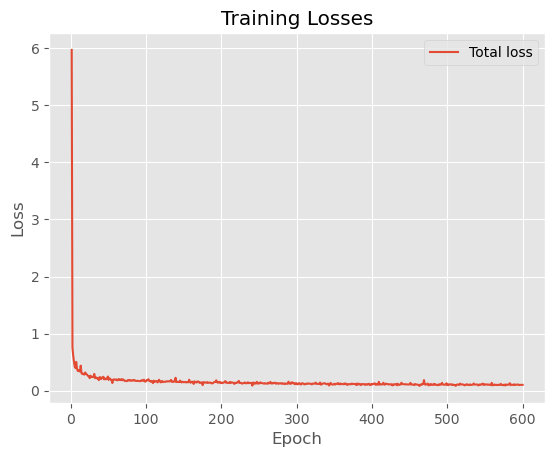

In [17]:
import matplotlib.pyplot as plt

with open('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Mask RCNN\\Dataset\\Iou (2).txt', 'r') as f:
    total_losses = []
    for line in f:
        if 'loss:' in line:
            loss_value = float(line.split('loss: ')[1].split()[0])
            total_losses.append(loss_value)

epochs = range(1, len(total_losses)+1)

plt.plot(epochs, total_losses, label='Total loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Losses')
plt.legend()
plt.show()


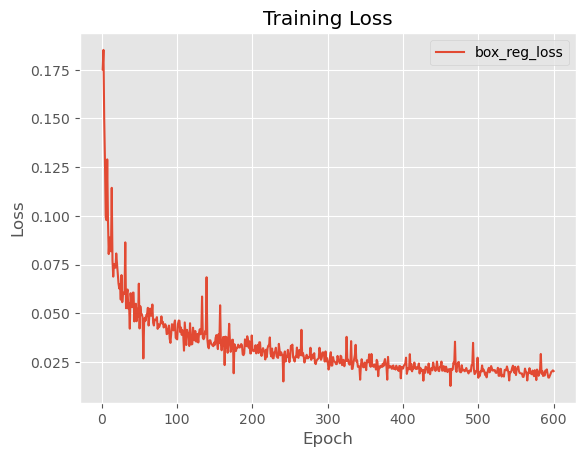

In [23]:
import matplotlib.pyplot as plt

with open('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Mask RCNN\\Dataset\\Iou (2).txt', 'r') as f:
    box_reg_losses = []
    for line in f:
        if 'loss_box_reg' in line:
            box_reg_loss = float(line.split('loss_box_reg: ')[1].split()[0])
            box_reg_losses.append(box_reg_loss)

epochs = range(1, len(box_reg_losses)+1)

plt.plot(epochs, box_reg_losses, label='box_reg_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

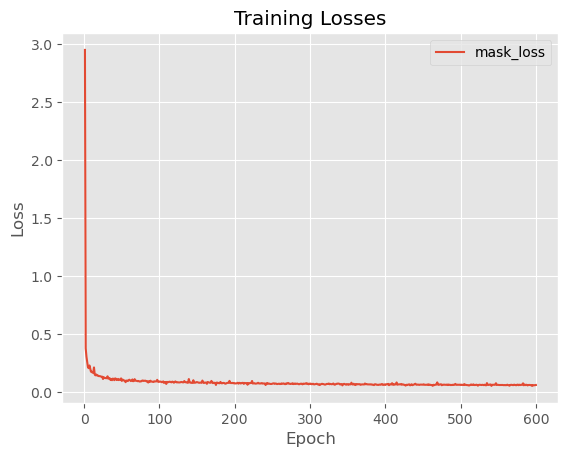

In [24]:
import matplotlib.pyplot as plt

with open('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Mask RCNN\\Dataset\\IoU (2).txt', 'r') as f:
    mask_losses = []
    for line in f:
        if 'loss_mask' in line:
            mask_loss = float(line.split('loss_mask: ')[1].split()[0])
            mask_losses.append(mask_loss)

epochs = range(1, len(mask_losses)+1)

plt.plot(epochs, mask_losses, label='mask_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Losses')
plt.legend()
plt.show()

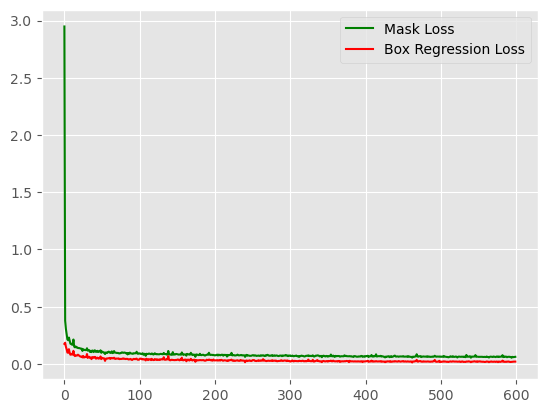

In [25]:
# Create a list of x-axis values (assuming each loss value corresponds to an epoch)
x_values = list(range(len(total_losses)))

# Plot mask losses in green
plt.plot(x_values, mask_losses, color='green', label='Mask Loss')

# Plot box regression losses in red
plt.plot(x_values, box_reg_losses, color='red', label='Box Regression Loss')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [26]:
losses = []

for i in range(0, len(total_losses), 5):
    losses.append(total_losses[i])

In [27]:
box_loss = []

for i in range(0, len(box_reg_losses), 6):
    box_loss.append(box_reg_losses[i])

In [28]:
mask_loss = []

for i in range(0, len(mask_losses), 6):
    mask_loss.append(mask_losses[i])

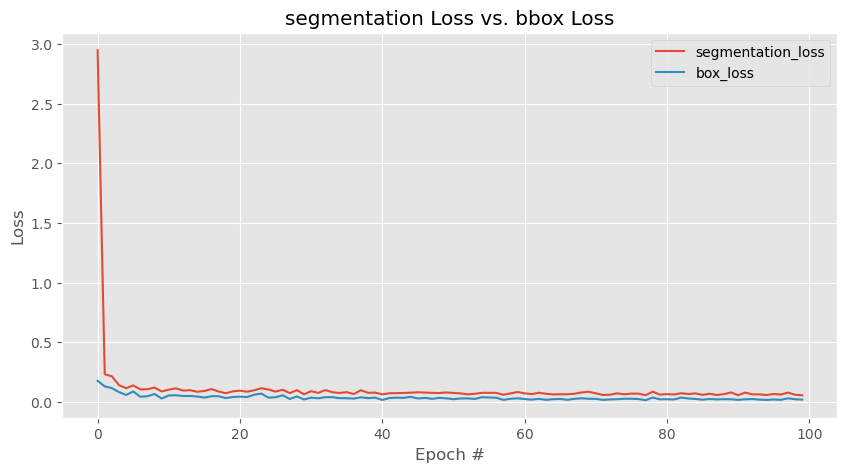

In [29]:
# plot the training loss
plt.style.use("ggplot")
fig1 = plt.figure(figsize=[10.0,5.0])
plt.plot(mask_loss, label="segmentation_loss")
plt.plot(box_loss, label="box_loss")
plt.title("segmentation Loss vs. bbox Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

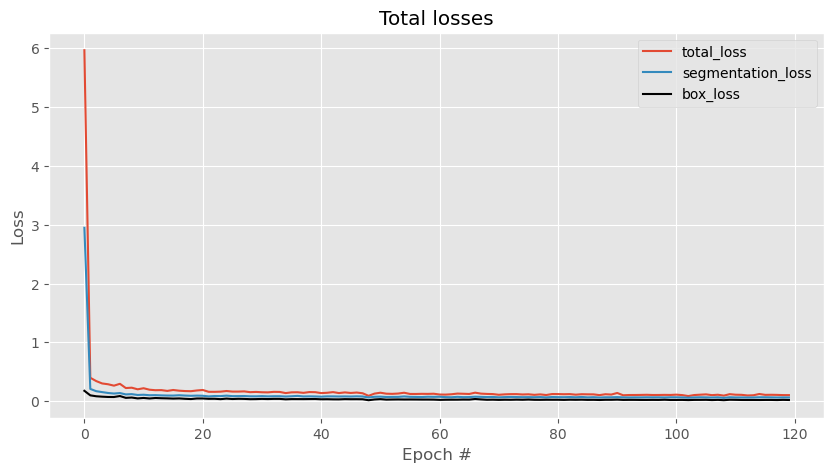

In [66]:
plt.style.use("ggplot")
fig1 = plt.figure(figsize=[10.0,5.0])
plt.plot(losses, label="total_loss")
plt.plot(mask_loss, label="segmentation_loss")
plt.plot(box_loss, label="box_loss", color = 'k')
plt.title("Total losses")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

In [1]:
import csv

bbox_ap = []
bbox_ar = []
segm_ap = []
segm_ar = []


with open('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Mask RCNN\\Dataset\\IoU.csv', 'r') as f:
    reader = csv.DictReader(f)
    column32 = [float(row['Column3.2']) for row in reader]

bbox_ap, bbox_ar, segm_ap, segm_ar = [], [], [], []
for i in range(0, len(column32), 4):
    bbox_ap.append(column32[i])
    bbox_ar.append(column32[i+1])
    segm_ap.append(column32[i+2])
    segm_ar.append(column32[i+3])

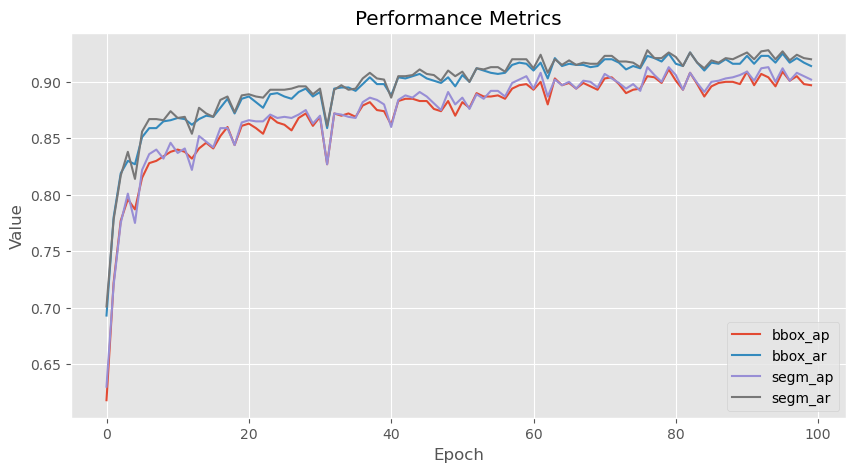

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# assume that you already have the four lists: bbox_ap, bbox_ar, segm_ap, and segm_ar

# create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# plot the values in the four lists
ax.plot(bbox_ap, label='bbox_ap')
ax.plot(bbox_ar, label='bbox_ar')
ax.plot(segm_ap, label='segm_ap')
ax.plot(segm_ar, label='segm_ar')

# set the title and axis labels
ax.set_title('Performance Metrics')
ax.set_xlabel('Epoch')
ax.set_ylabel('Value')

# add a legend
ax.legend()

# show the plot
plt.show()
